<h1>Heart Disease Prediction Using various models
</h1>


Problem Statement:<br>
To perform Machine Learning Algorithms like Logistic Regression, Decision Tree Classification and Naive Bayes Classification to predict whether a person would suffer a heart disease or not.
This is a data set used to predict heart disease. Patients were classified as having or not having heart disease based on cardiac catheterization, the gold standard. If they had more than 50% narrowing of a coronary artery they were labeled as having heart disease.

In this cohort, there are 270 patients and there are 13 independent predictive variables or column attributes. The attributes are explained on the website: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

After this dataset became available, the UCI data repository made another cohort available with 303 patients. They shared this with Kaggle which is a data competition initiative. First, the file format is .data which is uncommonly used. Secondly, the outcome was reversed by accident. This is why we are still using the older cohort of patients




In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('Heart_Disease.csv')

In [5]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [7]:
df.shape

(270, 14)

In [65]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

<h4>MEAN:Mean value of a dataset is the average value i.e. a number around which a whole data is spread out. All values used in calculating the average are weighted equally when defining the Mean</h4>

In [66]:
df.mean()

Age                         54.433333
Sex                          0.677778
Chest pain type              3.174074
BP                         131.344444
Cholesterol                249.659259
FBS over 120                 0.148148
EKG results                  1.022222
Max HR                     149.677778
Exercise angina              0.329630
ST depression                1.050000
Slope of ST                  1.585185
Number of vessels fluro      0.670370
Thallium                     4.696296
dtype: float64

<h4>Mode is decided by the frequency. The value which has more frequency in dataset column is mode.</h4>

In [67]:
df.mode()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,54,1,4,120,234,0,2,162,0,0.0,1,0,3,Absence


<h4>Median:The median is the number at position of (n+1)/2 in ordered dataset.where n is the number of data number.</h4>

In [68]:
df.median()

Age                         55.0
Sex                          1.0
Chest pain type              3.0
BP                         130.0
Cholesterol                245.0
FBS over 120                 0.0
EKG results                  2.0
Max HR                     153.5
Exercise angina              0.0
ST depression                0.8
Slope of ST                  2.0
Number of vessels fluro      0.0
Thallium                     3.0
dtype: float64

<h4>Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed.</h4>

In [69]:
df.skew()

Age                       -0.163615
Sex                       -0.765084
Chest pain type           -0.878767
BP                         0.722618
Cholesterol                1.183721
FBS over 120               1.991971
EKG results               -0.044703
Max HR                    -0.527737
Exercise angina            0.728915
ST depression              1.262893
Slope of ST                0.543151
Number of vessels fluro    1.209890
Thallium                   0.287268
dtype: float64

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


In [71]:
df['Heart Disease'] = df['Heart Disease'].map(
                   {'Presence':1 ,'Absence':0})


In [72]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


<h4>Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

In the world of Big Data, data visualization tools and technologies are essential to analyze massive amounts of information and make data-driven decisions.

</h4>

<h3>Correlation Matrix:</h3>
<br/>
<h5>A correlation matrix is a table showing correlation coefficients between sets of variables. Each random variable (Xi) in the table is correlated with each of the other values in the table (Xj). This allows you to see which pairs have the highest correlation.</h5>


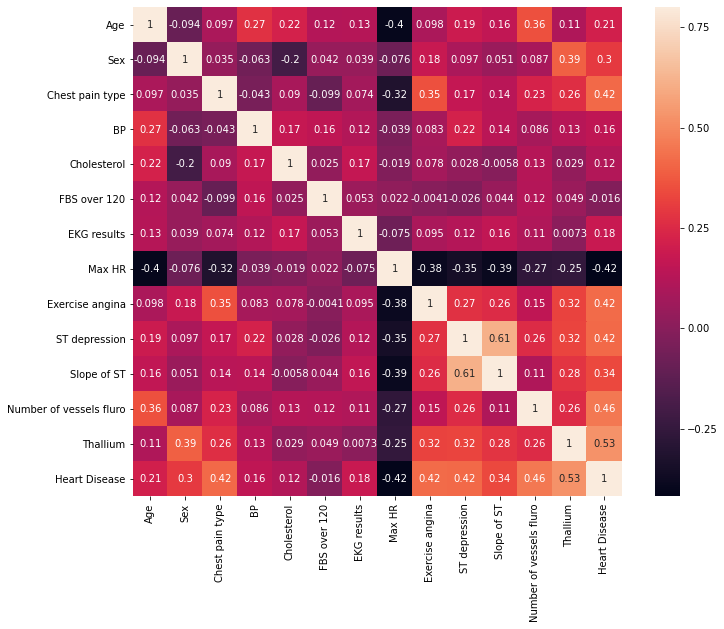

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

<h5>Histogram:A histogram is a graphical display of data using bars of different heights. In a histogram, each bar groups numbers into ranges. Taller bars show that more data falls in that range. A histogram displays the shape and spread of continuous sample data.</h5>

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Chest pain type'}>,
        <AxesSubplot:title={'center':'BP'}>],
       [<AxesSubplot:title={'center':'Cholesterol'}>,
        <AxesSubplot:title={'center':'FBS over 120'}>,
        <AxesSubplot:title={'center':'EKG results'}>,
        <AxesSubplot:title={'center':'Max HR'}>],
       [<AxesSubplot:title={'center':'Exercise angina'}>,
        <AxesSubplot:title={'center':'ST depression'}>,
        <AxesSubplot:title={'center':'Slope of ST'}>,
        <AxesSubplot:title={'center':'Number of vessels fluro'}>],
       [<AxesSubplot:title={'center':'Thallium'}>,
        <AxesSubplot:title={'center':'Heart Disease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

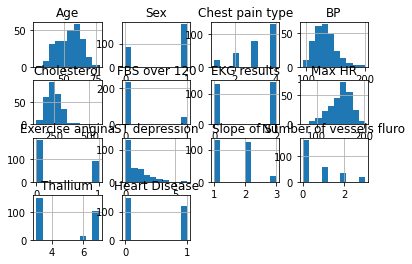

In [74]:
df.hist()

<h5>A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot(), so you can compare counts across nested variables.</h5>

<AxesSubplot:xlabel='Sex', ylabel='count'>

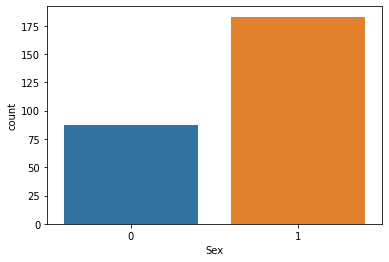

In [75]:
import seaborn as sns
sns.countplot(df['Sex'])

<AxesSubplot:xlabel='Chest pain type', ylabel='count'>

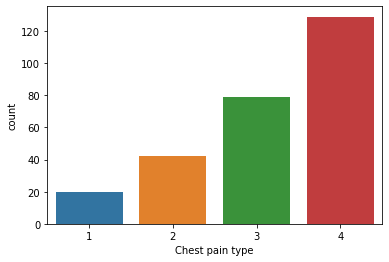

In [76]:
sns.countplot(df['Chest pain type'])

<AxesSubplot:xlabel='FBS over 120', ylabel='count'>

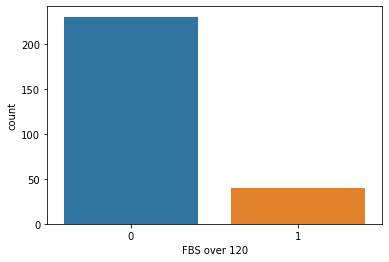

In [77]:
sns.countplot(df['FBS over 120'])

<AxesSubplot:xlabel='Age', ylabel='count'>

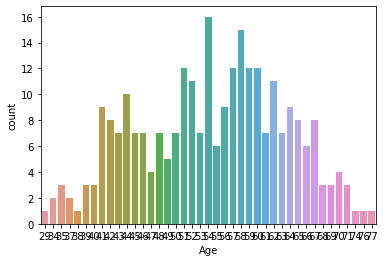

In [78]:
sns.countplot(df['Age'])

<AxesSubplot:xlabel='BP', ylabel='count'>

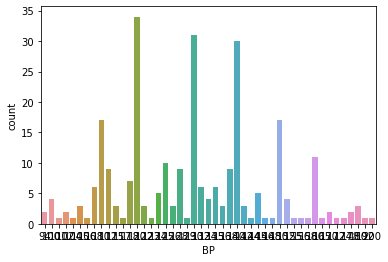

In [79]:
sns.countplot(df['BP'])

<AxesSubplot:xlabel='Exercise angina', ylabel='count'>

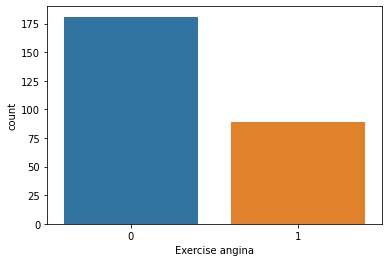

In [116]:
sns.countplot(df['Exercise angina'])

<AxesSubplot:xlabel='Number of vessels fluro', ylabel='count'>

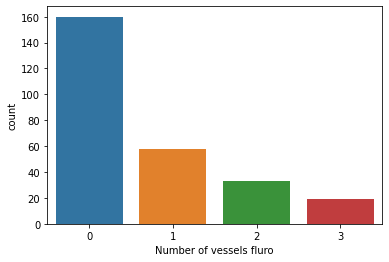

In [80]:
sns.countplot(df['Number of vessels fluro'])

<AxesSubplot:xlabel='Thallium', ylabel='count'>

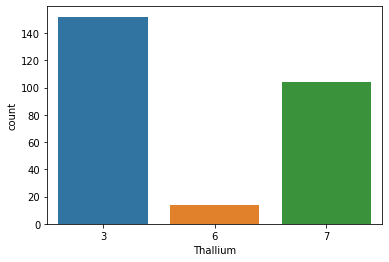

In [88]:
sns.countplot(df['Thallium'])

<h5>A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.</h5>

Text(0.5, 1.0, 'Blood Pressure')

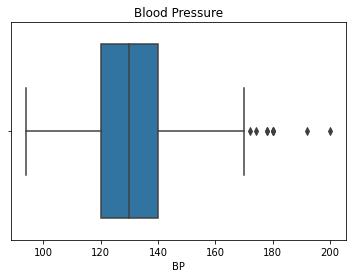

In [83]:
sns.boxplot(df['BP'])
plt.title('Blood Pressure')

Text(0.5, 1.0, 'Cholesterol')

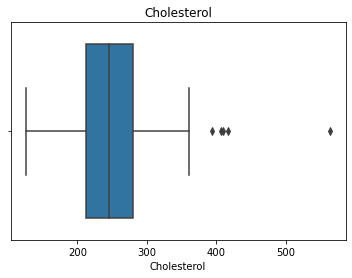

In [85]:
sns.boxplot(df['Cholesterol'])
plt.title('Cholesterol')

Text(0.5, 1.0, 'ST depression')

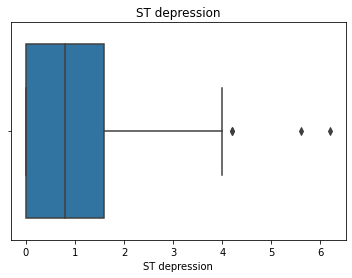

In [86]:
sns.boxplot(df['ST depression'])
plt.title('ST depression')

Text(0.5, 1.0, 'Max HR')

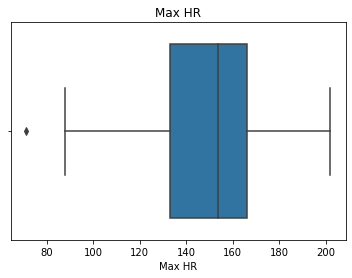

In [89]:
sns.boxplot(df['Max HR'])
plt.title('Max HR')

<h5>A pie chart is a type of graph that represents the data in the circular graph. The slices of pie show the relative size of the data. It is a type of pictorial representation of data. A pie chart requires a list of categorical variables and the numerical variables. Here, the term “pie” represents the whole, and the “slices” represent the parts of the whole.</h5>

Text(0.5, 1.0, 'Sex')

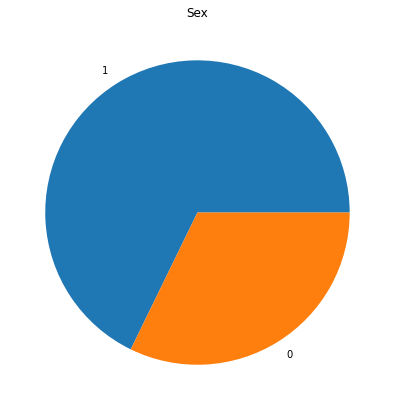

In [91]:
labels=df['Sex'].value_counts().index
plt.figure(figsize=(7,7))
s=df['Sex'].value_counts().values
plt.pie(s,labels=labels)
plt.title('Sex')

Text(0.5, 1.0, 'Chest Pain')

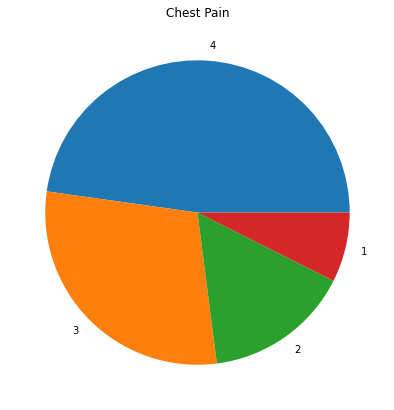

In [94]:
labels=df['Chest pain type'].value_counts().index
plt.figure(figsize=(7,7))
s=df['Chest pain type'].value_counts().values
plt.pie(s,labels=labels)
plt.title('Chest Pain')

Text(0.5, 1.0, 'Thallium')

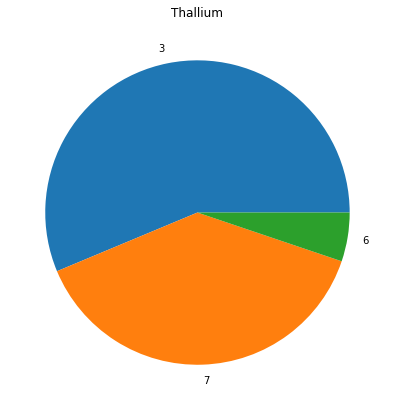

In [95]:
labels=df['Thallium'].value_counts().index
plt.figure(figsize=(7,7))
s=df['Thallium'].value_counts().values
plt.pie(s,labels=labels)
plt.title('Thallium')

Text(0.5, 1.0, 'FBS over 120')

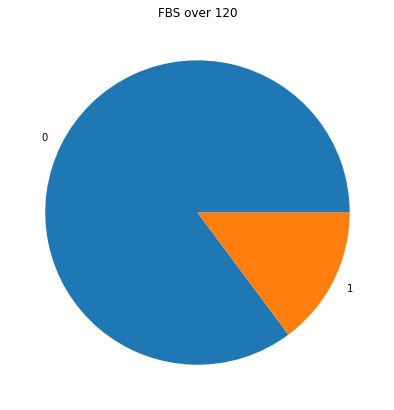

In [96]:
labels=df['FBS over 120'].value_counts().index
plt.figure(figsize=(7,7))
s=df['FBS over 120'].value_counts().values
plt.pie(s,labels=labels)
plt.title('FBS over 120')

Text(0.5, 1.0, 'Number of vessels fluro')

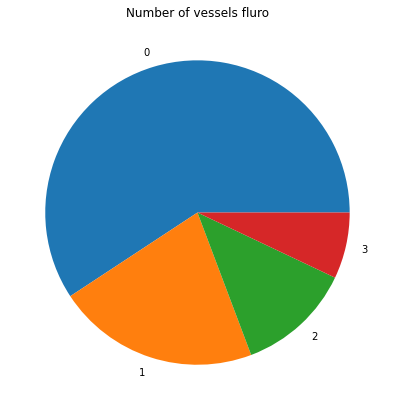

In [97]:
labels=df['Number of vessels fluro'].value_counts().index
plt.figure(figsize=(7,7))
s=df['Number of vessels fluro'].value_counts().values
plt.pie(s,labels=labels)
plt.title('Number of vessels fluro')

Text(0.5, 1.0, 'Heart Disease')

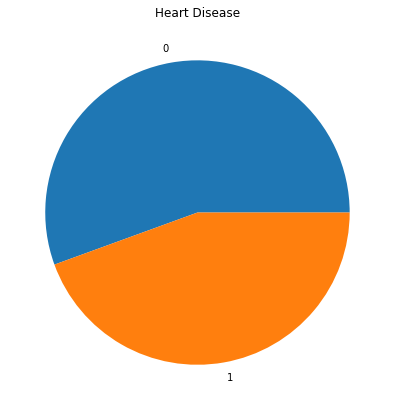

In [99]:
labels=df['Heart Disease'].value_counts().index
plt.figure(figsize=(7,7))
s=df['Heart Disease'].value_counts().values
plt.pie(s,labels=labels)
plt.title('Heart Disease')

Text(0.5, 1.0, 'Exercise angina')

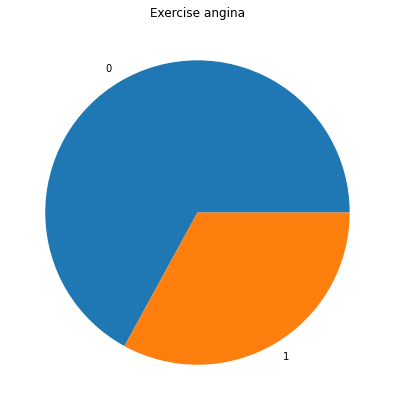

In [117]:
labels=df['Exercise angina'].value_counts().index
plt.figure(figsize=(7,7))
s=df['Exercise angina'].value_counts().values
plt.pie(s,labels=labels)
plt.title('Exercise angina')

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).



In [100]:
from sklearn.preprocessing import StandardScaler  
y=df['Heart Disease']
x=df.drop(columns=['Heart Disease'])
sc = StandardScaler()
x= sc.fit_transform(x)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


<h5>Train_test_split:Is used for splitting arrays or matrices into random train and test subsets</h5>

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)


<h5>Decision Tree:A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility.</h5>

In [103]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [104]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [106]:
y_p=clf.predict(X_test)
from sklearn import metrics
from sklearn.metrics import classification_report
print('Decision tree accuracy:',metrics.accuracy_score(y_test, y_p)*100)
print('Classification report:',classification_report(y_test,y_p))

Decision tree accuracy: 79.62962962962963
Classification report:               precision    recall  f1-score   support

           0       0.85      0.77      0.81        30
           1       0.74      0.83      0.78        24

   micro avg       0.80      0.80      0.80        54
   macro avg       0.80      0.80      0.80        54
weighted avg       0.80      0.80      0.80        54



<h5>Naive Bayes Classifier:Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a "single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.</h5>

In [112]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred=gnb.predict(X_test)
print(' Guassian Naive bayes accuracy:',metrics.accuracy_score(y_test, y_pred)*100)
print('Classification report:',classification_report(y_test,y_pred))

 Guassian Naive bayes accuracy: 74.07407407407408
Classification report:               precision    recall  f1-score   support

           0       0.77      0.77      0.77        30
           1       0.71      0.71      0.71        24

   micro avg       0.74      0.74      0.74        54
   macro avg       0.74      0.74      0.74        54
weighted avg       0.74      0.74      0.74        54



<h5>Logistic Regression:Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).</h5>

In [108]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [111]:
model.fit(X_train,y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [113]:
y_pred=model.predict(X_test)
print(' Guassian Naive bayes accuracy:',metrics.accuracy_score(y_test, y_pred)*100)
print('Classification report:',classification_report(y_test,y_pred))

 Guassian Naive bayes accuracy: 77.77777777777779
Classification report:               precision    recall  f1-score   support

           0       0.80      0.80      0.80        30
           1       0.75      0.75      0.75        24

   micro avg       0.78      0.78      0.78        54
   macro avg       0.78      0.78      0.78        54
weighted avg       0.78      0.78      0.78        54



<h3>Results and Analysis</h3>
<h5>
The decision tree accuracy is approximately 79.629%
<br/>
The Gaussian Naiva Bayes classifier accuracy is approximately 74.072%
<br/>
The Logistic regression accuracy is approximately 77.777%
<br/>
So in this analysis, The decision tree classifier presents the highest accuracy.
<br/>
</h5>